In [2]:
from Pysces import *

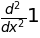

In [3]:
Derivative(1, x, x)

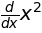

In [4]:
Derivative(x**2, x)

In [5]:
Derivative(x**2, x).doit()

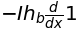

In [6]:
P_OPERATOR(x)

Issue: the above commutator has "1" as a placeholder.

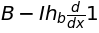

In [13]:
P_OPERATOR(x)*B

We want the "B" to automatically replace the "1" in the Derivative() function.

### sympy derivative is defined as:

class Derivative(sympy.core.expr.Expr)

 |  "Derivative(expr, *variables, **kwargs)"
 
#### Variables and kwargs are optional arguments, expr. (expression) is not...

Therefore, it looks like it needs something in that position... Is it possible to automatically change this expression from the placeholder, "1", to the expression of interest?

This is important for expectation values, for example.

## Option One:

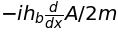

In [8]:
def REPLACE_OPERATOR(R, B, K):
    if K == x:
        return sympify(str(R).replace(str(Derivative(1, x)), str(Derivative(B, x))))

REPLACE_OPERATOR((HAMILTONIAN(x)), A, x)

This would need copy and paste... Trying to avoid this.

## Option Two:

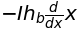

In [12]:
def P_OPERATOR(x, B = None):
    h_b = Symbol("h_b")
    if B == None:
        return Operator(-I*h_b*(Derivative("1", x)))
    else:
        return Operator(-I*h_b*(Derivative(B, x)))
    
P_OPERATOR(x, x)

This option involves having multiple parameters for the operators themselves. However, it also involves understanding how an expression is set up... Maybe look into an if/else statement that involves replacements, similar to the EXPRESSION_REPLACE() function already defined.

More specifically, the if/else statement should be able to replace two functions with the redefined P_OPERATOR function with two parameters.